In [22]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


if tf.config.list_physical_devices('GPU'): 
  from tensorflow.compat.v1.keras.backend import set_session
  config = tf.compat.v1.ConfigProto()
  config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
  config.log_device_placement = True  # to log device placement (on which device the operation ran)
  sess = tf.compat.v1.Session(config=config)
  set_session(sess)



Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5



2021-08-20 17:32:05.099467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-20 17:32:05.100109: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-08-20 17:32:05.100269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-20 17:32:05.100862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-20 17:32:05.101366: I tensorflow/core/common_runtime/gpu/g

Let's try an keras example: https://keras.io/examples/vision/mnist_convnet/ 

In [23]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [24]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [25]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3690 - accuracy: 0.8885 - val_loss: 0.0857 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1125 - accuracy: 0.9655 - val_loss: 0.0567 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.0455 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9785 - val_loss: 0.0417 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9815 - val_loss: 0.0415 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0336 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0334 - val_accuracy: 0.9902
Epoch 

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.026404544711112976
Test accuracy: 0.9908000230789185


In [6]:
y_pred= model.predict(x_test)

In [7]:
y_pred_idx = np.argmax(y_pred, axis=1) 
y_test_idx = np.argmax(y_test, axis=1) 

(10000,)

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
# print confusion matrix 
cm = confusion_matrix(y_test_idx, y_pred_idx)
col_sum = np.sum(cm, axis = 0)
print(cm)

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1132    3    0    0    0    0    0    0    0]
 [   1    0 1028    0    1    0    0    1    1    0]
 [   0    0    2 1005    0    2    0    0    1    0]
 [   0    0    0    0  979    0    1    0    1    1]
 [   1    0    1    4    0  884    1    0    1    0]
 [   5    2    1    0    1    4  943    0    2    0]
 [   0    4    8    0    1    0    0 1013    1    1]
 [   1    0    3    1    1    0    0    1  966    1]
 [   1    3    2    1   11    6    0    3    2  980]]


In [11]:
# triage the data 

error_list = np.where(y_pred_idx != y_test_idx)[0]

In [12]:
error_list.shape

(92,)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
# visualizing errors. see https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
import matplotlib.pyplot as plt
%matplotlib inline 

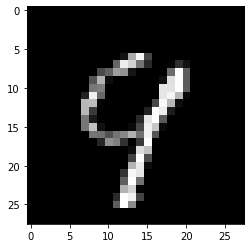

In [15]:
# pick a sample to plot
sample = 882
image = x_test[sample].reshape(28,28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

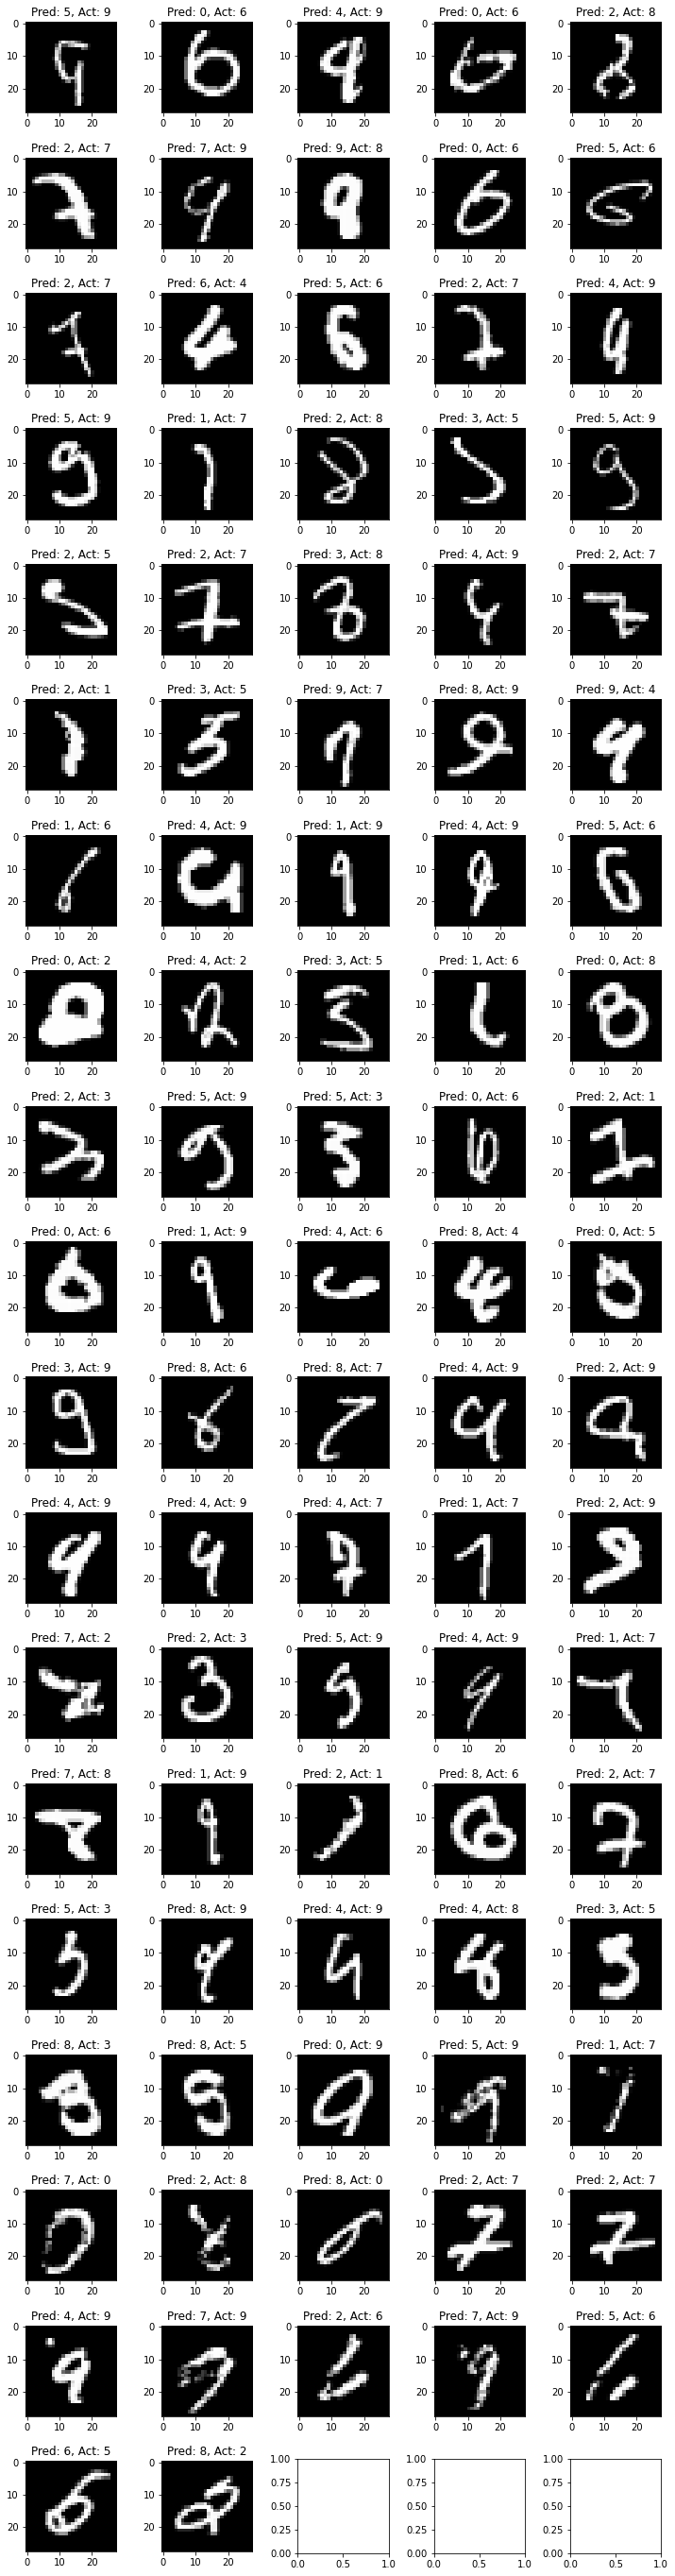

In [16]:
num_col = 5
num_row = error_list.shape[0] // 5 + 1
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(error_list.shape[0]):
    img_idx = error_list[i]
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_test[img_idx].reshape(28,28), cmap='gray')
    ax.set_title('Pred: {}, Act: {}'.format(y_pred_idx[img_idx],y_test_idx[img_idx]))
plt.tight_layout()
plt.show()